# Time series methods
Time series is a common pandas Series object where index is a date. Often period between each timepoint (delta) is equal, but not necessarily. This type is widely spread in financial data and time course experiments.  
Pandas timestamp which represents the time is quite flexible and capable of parsing dates. Yet it is out of note scope.

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Restricting number of displaying rows, just for convenience
pd.set_option('max_rows', 8)
%matplotlib inline

## Load data
Let's load dataframe containing open, high, low, close prices and traded volume of stock in corresponding dates.

In [73]:
stock = pd.read_csv('data/amzn_stock.csv', index_col='Date', parse_dates=True)
stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


## Time Features
Date index provide more opportunities for working with data

### Partial Indexing
With time series we are able to obtain rows with partially matched date

In [74]:
# Take stock information for the February of the 2010
stock['2010-02']
# Similar to stock.loc['2010-02']

,Open,High,Low,Close,Volume
Date,,,,,
2010-02-01,123.18,124.86,113.82,118.87,37774317
2010-02-02,118.79,118.98,114.40,118.12,23084986
2010-02-03,117.12,119.61,116.56,119.10,12409012
2010-02-04,118.64,120.33,115.74,115.94,12783912
...,...,...,...,...,...
2010-02-23,118.01,119.25,116.51,117.24,7069011
2010-02-24,117.96,119.80,117.15,119.72,7393039
2010-02-25,118.17,118.34,115.85,118.20,9535889
2010-02-26,117.88,119.43,117.00,118.40,5721864


In [75]:
# This inexact date matching also works in slices
stock.loc['2010-02':'2011']

,Open,High,Low,Close,Volume
Date,,,,,
2010-02-01,123.18,124.86,113.82,118.87,37774317
2010-02-02,118.79,118.98,114.40,118.12,23084986
2010-02-03,117.12,119.61,116.56,119.10,12409012
2010-02-04,118.64,120.33,115.74,115.94,12783912
...,...,...,...,...,...
2011-12-27,177.73,178.59,176.16,176.27,2951104
2011-12-28,176.39,176.65,172.28,173.89,3660008
2011-12-29,169.62,174.55,166.97,173.86,8212559
2011-12-30,173.36,175.17,172.49,173.10,4280263


Previously used matching works if we provide first part of index e.g. year and month
To filter rows with appropriate time (hours and so on) no matter what date (starting from day) is 
we can use these methods:
* `between_time(start_time, end_time, include_start=True, include_end=True)` - take rows with time from `start_time` to `end_time` inclusively by default
* `at_time(time)` - take rows with specified `time`

For more detailed work with dates you probably should have a look at [first](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.first.html) and [last](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.last.html#pandas.DataFrame.last) methods

### Resampling
There are 2 types of resampling - downsampling and upsampling. First is similar to grouping by time intervals and you get lesser number of points. Second leads to expanding of series - each point is explodes into a pile of them.

In [76]:
# Downsampling - 1-year interval is greater than delta between points in original df
# We take each year and median value for it
stock.resample('1y').mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-12-31,138.971036,140.926853,137.019761,139.169602,7.288140e+06
2011-12-31,196.658413,199.444762,193.525516,196.663849,5.810698e+06
2012-12-31,220.011040,222.679440,217.588840,220.303680,4.200934e+06
2013-12-31,297.866270,300.925913,294.656587,298.032222,2.969756e+06
2014-12-31,332.799841,336.317460,328.545476,332.550913,4.088199e+06
2015-12-31,478.123532,483.248452,472.881905,478.138294,3.786690e+06
2016-12-31,699.756587,705.799127,692.646071,699.523135,4.103240e+06
2017-12-31,900.935259,906.482370,894.366593,901.238963,3.558034e+06


In [77]:
# Upsampling - 2-hour interval is smaller than delta between points in original df
# Here we unfold each day into 12 points
stock.resample('2h').asfreq()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04 00:00:00,136.25,136.61,133.14,133.90,7600543.0
2010-01-04 02:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 04:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 06:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2017-07-16 18:00:00,NaN,NaN,NaN,NaN,NaN
2017-07-16 20:00:00,NaN,NaN,NaN,NaN,NaN
2017-07-16 22:00:00,NaN,NaN,NaN,NaN,NaN
2017-07-17 00:00:00,1004.69,1014.75,1003.81,1010.04,3668721.0


Grouping by time makes it possible to get stats about time intervals from df

In [78]:
# Number of rows per 2-week interval
stock.resample('2w').size()

Date
2010-01-10     5
2010-01-24     9
2010-02-07    10
2010-02-21     9
              ..
2017-06-18    10
2017-07-02    10
2017-07-16     9
2017-07-30     1
Freq: 2W-SUN, Length: 198, dtype: int64

After resampling you can use 1 of predefined methods (like `std`, `var`, `mean`, `nunique`) or make more complex operations via `agg()` method

In [79]:
# Just for example, similar to stock.resample('y')['Open', 'High'].sum()
stock.resample('y')['Open', 'High'].agg(np.sum)

,Open,High
Date,,
2010-12-31,34881.73,35372.64
2011-12-31,49557.92,50260.08
2012-12-31,55002.76,55669.86
2013-12-31,75062.30,75833.33
2014-12-31,83865.56,84752.00
2015-12-31,120487.13,121778.61
2016-12-31,176338.66,177861.38
2017-12-31,121626.26,122375.12


Also you can use resample not only when you have date index, but if you have column with time in df. Just pass its name to `on` parameter of `resample()`.

### Date attributes
We have access to date properties of time stamp via index or from a `dt` attribute of column

In [80]:
# Obtain weekday of each date from index and count number of values for each day
stock.index.weekday_name.value_counts()

Wednesday    390
Tuesday      389
Thursday     382
Friday       380
Monday       355
Name: Date, dtype: int64

In [81]:
# Reset index, to get date column and repeat operation
stock.reset_index()['Date'].dt.weekday_name.value_counts()

Wednesday    390
Tuesday      389
Thursday     382
Friday       380
Monday       355
Name: Date, dtype: int64

In [82]:
# Available attributes in the dt
print('\n'.join([a for a in dir(stock.reset_index()['Date'].dt) if not a.startswith('_')]))

ceil
date
day
dayofweek
dayofyear
days_in_month
daysinmonth
floor
freq
hour
is_leap_year
is_month_end
is_month_start
is_quarter_end
is_quarter_start
is_year_end
is_year_start
microsecond
minute
month
nanosecond
normalize
quarter
round
second
strftime
time
to_period
to_pydatetime
tz
tz_convert
tz_localize
week
weekday
weekday_name
weekofyear
year


## Plotting
It is very convinient to look at time series - we obtain line plot with time on x-axis via `plot()` method.  
Figure's attributes can be modified in `plot()` parameters or via matplotlib.

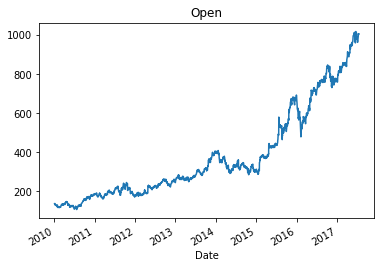

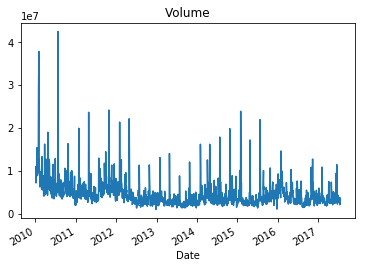

In [13]:
# Create plot of open prices vs time
stock['Open'].plot(title='Open')

# To separate plots
plt.figure()

# Create plot of volume vs time. Semicolon to supress returning the object from the cell
stock['Volume'].plot(title='Volume');

## Expanding and rolling ~~stones~~ windows
Sometimes you will need to apply some function on overlapping pieces of your series, say you need to obtain mean of each 10 adjacent values. For this task you can use rolling window with mean. On the other hand, there is a type of problem when you need to apply function for your first 10 samples, first 11 samples, etc., i.e. size of your window is expanding - expanding window is exactly for it. Furthermore, we have exponentially weighted windows (EMW) in which weights of samples is unequal - these windows are similar to expanding, but in rolling all samples have equal weight.  
One great application of window functions is smoothing of curves. Let's have a look.

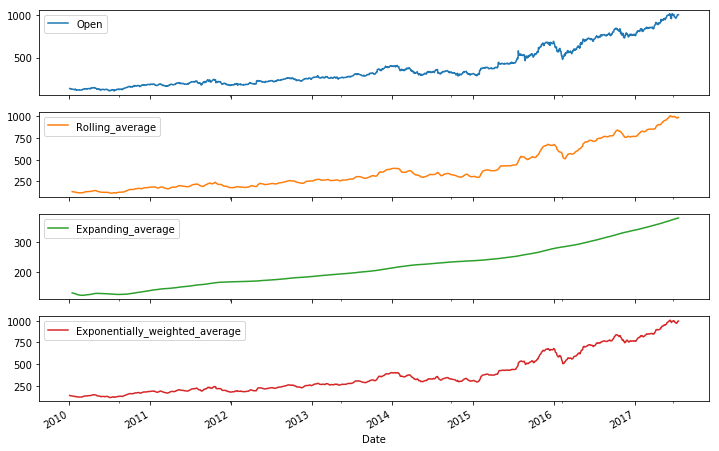

In [90]:
# Create new dataframe with stock open prices
smoothes = pd.DataFrame(stock['Open'])

# Add 3 columns with different windows used for smoothing
smoothes['Rolling_average'] = smoothes['Open'].rolling(10).mean()
smoothes['Expanding_average'] = smoothes['Open'].expanding(10).mean()
smoothes['Exponentially_weighted_average'] = smoothes['Open'].ewm(alpha=0.3).mean()

# Plot ariginal and smoothed curves
smoothes.plot(subplots=True, figsize=(12, 8));

Here we have used `mean()` it's not neccessary, other functions (like median) can be a choice too. Note expanding window is a bad alternative in this case.  
Now let's consider another way of using windows

In [27]:
# This is a way to get cumulative sum of a whole column
stock.cumsum()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7.600543e+06
2010-01-05,269.68,272.09,264.95,268.59,1.645700e+07
2010-01-06,404.28,406.82,396.60,400.84,2.363798e+07
2010-01-07,536.29,539.14,525.40,530.84,3.466810e+07
...,...,...,...,...,...
2017-07-12,713810.61,720876.94,706060.46,713899.19,8.582402e+09
2017-07-13,714815.23,721883.82,707056.36,714899.82,8.585283e+09
2017-07-14,715817.63,722888.27,708053.25,715901.63,8.587385e+09
2017-07-17,716822.32,723903.02,709057.06,716911.67,8.591054e+09


In [32]:
# This is a variant to obtain cumsum for each triple, note that first n - 1 observations 
# are NA (there is no predecessors for them)
stock.rolling(3).sum()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,404.28,406.82,396.60,400.84,23637976.0
2010-01-07,400.04,402.53,392.26,396.94,27067557.0
...,...,...,...,...,...
2017-07-12,2978.65,3003.98,2965.32,2997.11,10137568.0
2017-07-13,2998.27,3011.42,2977.72,3001.27,9472069.0
2017-07-14,3007.67,3019.88,2990.89,3008.95,8591812.0
2017-07-17,3011.71,3026.08,2996.60,3012.48,8651959.0


In [29]:
# Similar to previous but fill first n - 1 points with 1st value, 1st +2nd and so on
stock.rolling(3, min_periods=1).sum()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543.0
2010-01-05,269.68,272.09,264.95,268.59,16456999.0
2010-01-06,404.28,406.82,396.60,400.84,23637976.0
2010-01-07,400.04,402.53,392.26,396.94,27067557.0
...,...,...,...,...,...
2017-07-12,2978.65,3003.98,2965.32,2997.11,10137568.0
2017-07-13,2998.27,3011.42,2977.72,3001.27,9472069.0
2017-07-14,3007.67,3019.88,2990.89,3008.95,8591812.0
2017-07-17,3011.71,3026.08,2996.60,3012.48,8651959.0


## OHLC
Data which was used above as an example contains open, high, low, close columns which are utilized in financial analysis and denote the earliest, the highest, the lowest and the latest prices of stock for a given day. To compute them from a fine-grained data (with definition higher than 1 day, several points per day more precisely) one can use special function `ohlc()`. Before using this method `resample()` should be applied.

In [110]:
# Generate some data
index = pd.date_range('2017-01', freq='2h', periods=1000)
df = pd.DataFrame({'price': 30 * np.random.randn(1000) + 175}, index=index)

In [112]:
df

,price
2017-01-01 00:00:00,218.357933
2017-01-01 02:00:00,146.491072
2017-01-01 04:00:00,175.200117
2017-01-01 06:00:00,198.442808
...,...
2017-03-25 00:00:00,162.265111
2017-03-25 02:00:00,160.008155
2017-03-25 04:00:00,191.162965
2017-03-25 06:00:00,116.630503


In [138]:
# Resampling with day frequency and ohlc
df.resample('1d').ohlc()

price                                    
                  open        high         low       close
2017-01-01  218.357933  218.357933  120.336963  193.654057
2017-01-02  176.722135  219.111915  113.439671  201.172726
2017-01-03  170.870806  214.155150  149.364135  206.905226
2017-01-04  138.272026  223.897230  138.272026  161.142141
...                ...         ...         ...         ...
2017-03-22  161.309627  183.995890  142.704036  158.404321
2017-03-23  174.488373  225.102794  139.536456  197.038656
2017-03-24  168.046671  213.395584  143.659679  147.136769
2017-03-25  162.265111  191.162965  116.630503  116.630503

[84 rows x 4 columns]